In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
warnings.filterwarnings("ignore")


In [321]:
# data load : change path 
cab_data = pd.read_csv('D:/ml/uber_analysis/uber_lyft_cab_price/cab_rides.csv')
#cab_data = pd.read_csv('C:/work/Uber_data/uber-lyft-cab-prices/cab_rides.csv')


In [322]:
cab_data.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft


In [323]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


Number of Lyft :  385663
Number of Uber :  307408


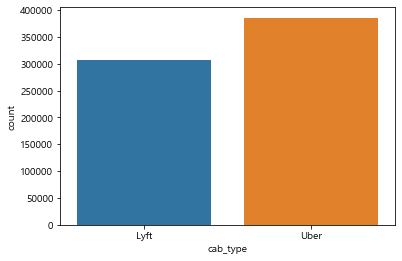

In [324]:
ax = sns.countplot(cab_data.cab_type, label="Count")
Lyft, Uber = cab_data.cab_type.value_counts()
print('Number of Lyft : ', Lyft)
print('Number of Uber : ', Uber)

In [325]:
uber = cab_data[cab_data['cab_type']=='Uber']

In [326]:
uber_c_col = uber.columns[uber.dtypes == 'object']
uber_n_col = uber.columns[uber.dtypes != 'object']

In [327]:
uber[uber_n_col].isna().sum()

distance                0
time_stamp              0
price               55095
surge_multiplier        0
dtype: int64

In [328]:
uber[uber_n_col].isna().sum() / len(uber[uber_n_col]*100)

distance            0.000000
time_stamp          0.000000
price               0.142858
surge_multiplier    0.000000
dtype: float64

In [329]:
uber.dropna(how='any', inplace=True)

In [330]:
uber[uber_n_col].isna().sum()

distance            0
time_stamp          0
price               0
surge_multiplier    0
dtype: int64

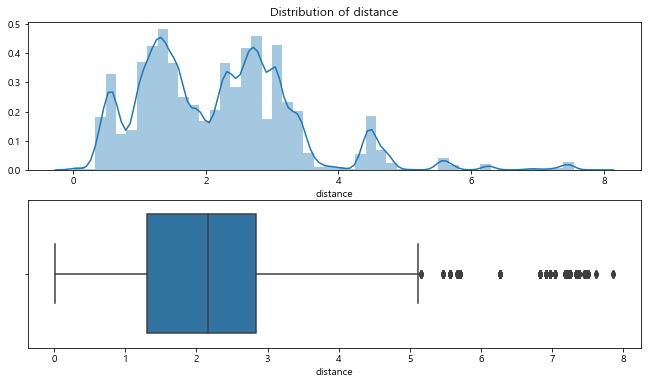

count    330568.0000
mean          2.1914
std           1.1790
min           0.0200
25%           1.3000
50%           2.1700
75%           2.8400
max           7.8600
Name: distance, dtype: float64
Skewness          1.014
Kurtosis          1.9675


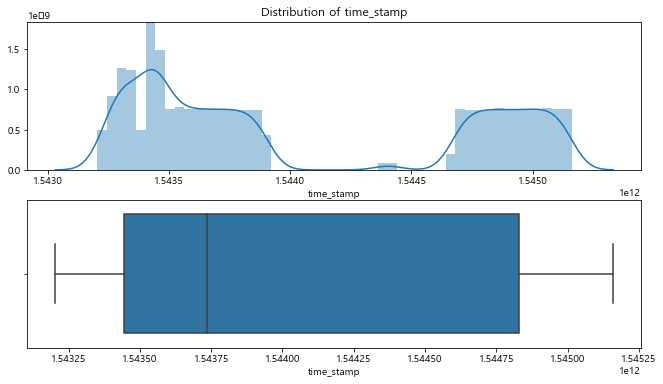

count    3.305680e+05
mean     1.544046e+12
std      6.897122e+08
min      1.543204e+12
25%      1.543444e+12
50%      1.543737e+12
75%      1.544828e+12
max      1.545161e+12
Name: time_stamp, dtype: float64
Skewness          0.4313
Kurtosis          -1.5655


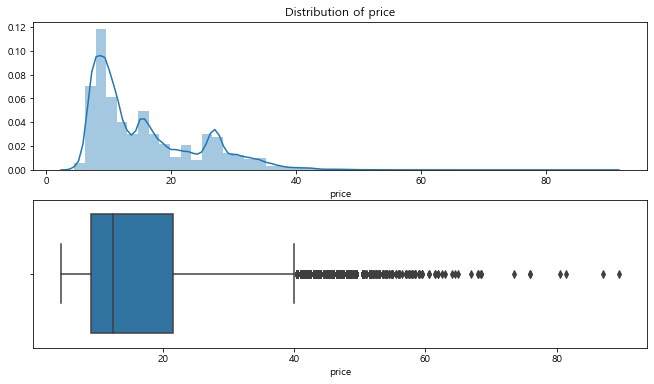

count    330568.0000
mean         15.7953
std           8.5603
min           4.5000
25%           9.0000
50%          12.5000
75%          21.5000
max          89.5000
Name: price, dtype: float64
Skewness          1.0529
Kurtosis          0.4401


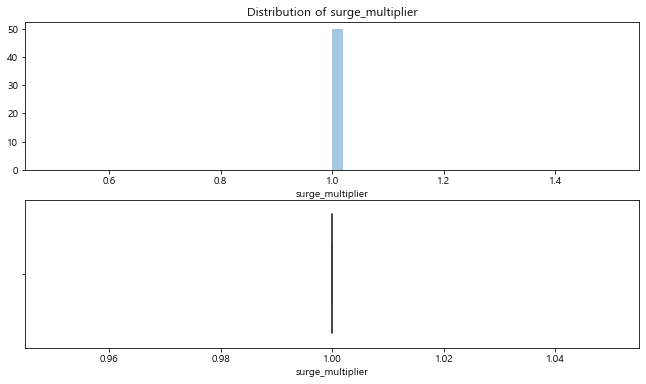

count    330568.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: surge_multiplier, dtype: float64
Skewness          0
Kurtosis          0


In [331]:
for i in uber_n_col:
    
    f, axes = plt.subplots(2, 1, figsize=(11, 6))

    sns.distplot(uber[i], ax = axes[0]).set_title("Distribution of "+i)
    sns.boxplot(uber[i], ax = axes[1])
    plt.show()
    
    print(round(uber[i].describe(), 4))
    print('Skewness         ',round(uber[i].skew(),4))
    print('Kurtosis         ',round(uber[i].kurtosis(),4))

In [332]:
uber[uber_c_col].head(3)

,cab_type,destination,source,id,product_id,name
12,Uber,West End,North End,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,Uber,West End,North End,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,Uber,West End,North End,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX


In [333]:
for i in uber_c_col:
    
    print(i, "unique value min/max/median")
    print("Min    : ", uber[i].value_counts().min())
    print("Max    : ", uber[i].value_counts().max())
    print("Median : ", uber[i].value_counts().median())
    print('\n')

cab_type unique value min/max/median
Min    :  330568
Max    :  330568
Median :  330568.0


destination unique value min/max/median
Min    :  27251
Max    :  27954
Median :  27546.0


source unique value min/max/median
Min    :  27250
Max    :  27960
Median :  27546.0


id unique value min/max/median
Min    :  1
Max    :  1
Median :  1.0


product_id unique value min/max/median
Min    :  55091
Max    :  55096
Median :  55095.5


name unique value min/max/median
Min    :  55091
Max    :  55096
Median :  55095.5




In [334]:
uber_c_col_del_id = uber_c_col.drop(["cab_type","id"])

In [335]:
uber_c_col_del_id

Index(['destination', 'source', 'product_id', 'name'], dtype='object')

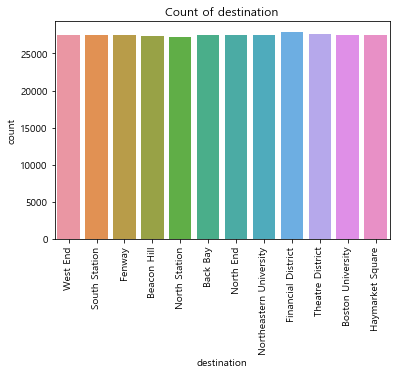

Financial District         27954
Theatre District           27653
Haymarket Square           27558
Boston University          27557
North End                  27550
Fenway                     27546
Northeastern University    27546
Back Bay                   27540
South Station              27539
West End                   27498
Beacon Hill                27376
North Station              27251
Name: destination, dtype: int64


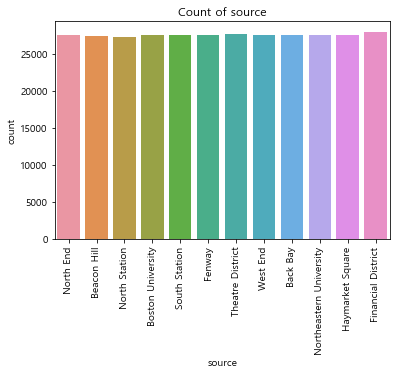

Financial District         27960
Theatre District           27671
Boston University          27552
North End                  27551
Northeastern University    27550
Fenway                     27546
Back Bay                   27546
South Station              27540
Haymarket Square           27533
West End                   27492
Beacon Hill                27377
North Station              27250
Name: source, dtype: int64


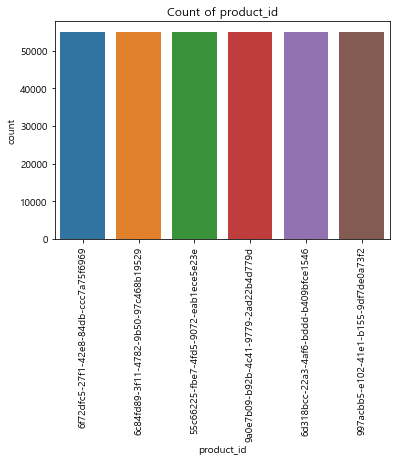

6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
Name: product_id, dtype: int64


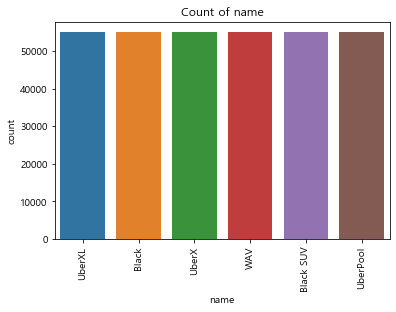

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
UberX        55094
UberPool     55091
Name: name, dtype: int64


In [336]:
for i in uber_c_col_del_id:
    
    ax = sns.countplot(uber[i])
    ax.set_title("Count of "+i)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()
    
    print(uber[i].value_counts())

In [337]:
pd.crosstab(uber['name'], uber['product_id'])

product_id,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d
name,,,,,,
Black,0,55095,0,0,0,0
Black SUV,0,0,55096,0,0,0
UberPool,0,0,0,0,55091,0
UberX,55094,0,0,0,0,0
UberXL,0,0,0,55096,0,0
WAV,0,0,0,0,0,55096


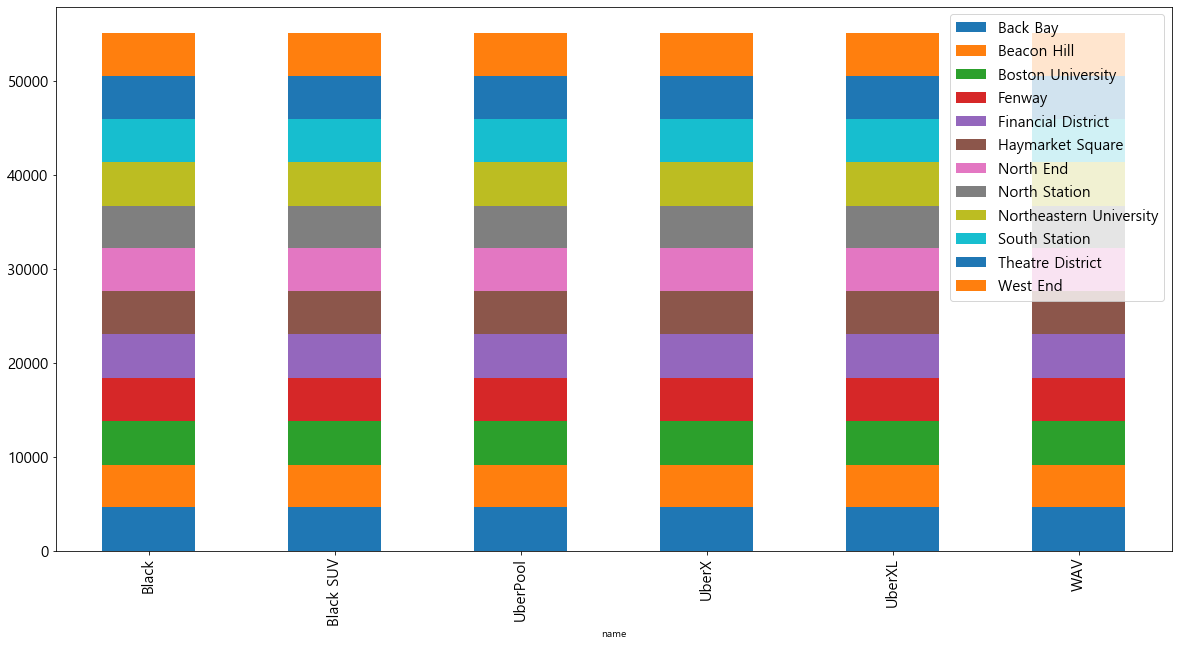

In [338]:
pd.crosstab(uber['name'], uber['source']).plot.bar(figsize = (20,10),stacked=True, fontsize = 15)
plt.legend(fontsize=15, loc = 'best')

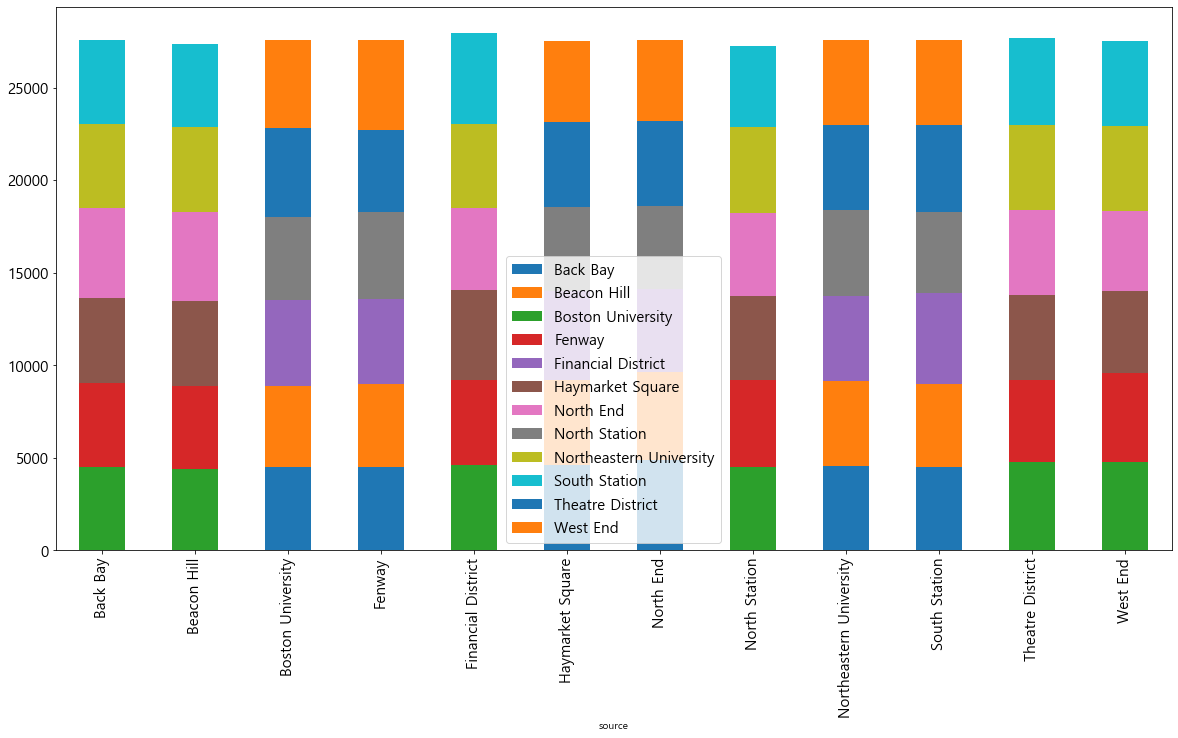

In [339]:
pd.crosstab(uber['source'], uber['destination']).plot.bar(figsize = (20,10),stacked=True, fontsize = 15)
plt.legend(fontsize=15)

In [340]:
pd.crosstab(uber['source'], uber['destination'])

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
source,,,,,,,,,,,,
Back Bay,0,0,4518,4506,0,4602,4866,0,4554,4500,0,0
Beacon Hill,0,0,4392,4488,0,4584,4794,0,4614,4505,0,0
Boston University,4518,4386,0,0,4626,0,0,4500,0,0,4758,4764
Fenway,4512,4488,0,0,4590,0,0,4686,0,0,4440,4830
Financial District,0,0,4626,4602,0,4824,4446,0,4554,4908,0,0
Haymarket Square,4602,4584,0,0,4824,0,0,4560,0,0,4571,4392
North End,4866,4794,0,0,4446,0,0,4481,0,0,4590,4374
North Station,0,0,4500,4686,0,4566,4480,0,4650,4368,0,0
Northeastern University,4554,4618,0,0,4560,0,0,4650,0,0,4620,4548


In [341]:
uber['source'].unique()

array(['North End', 'Beacon Hill', 'North Station', 'Boston University',
       'South Station', 'Fenway', 'Theatre District', 'West End',
       'Back Bay', 'Northeastern University', 'Haymarket Square',
       'Financial District'], dtype=object)

In [342]:
pd.options.display.max_rows = 100
uber.groupby(by=['source', 'destination']).mean()

distance    time_stamp  \
source                  destination                                       
Back Bay                Boston University        1.389017  1.544019e+12   
                        Fenway                   1.340053  1.544038e+12   
                        Haymarket Square         2.417653  1.544050e+12   
                        North End                2.964969  1.544052e+12   
                        Northeastern University  1.168116  1.544030e+12   
                        South Station            3.627920  1.544051e+12   
Beacon Hill             Boston University        2.264604  1.544048e+12   
                        Fenway                   2.318035  1.544055e+12   
                        Haymarket Square         1.344228  1.544019e+12   
                        North End                1.808436  1.544021e+12   
                        Northeastern University  2.086346  1.544044e+12   
                        South Station            2.294886  1.544051e+12   
Boston University       Back Bay                 1.523772  1.544029e+12   
                        Beacon Hill              2.798440  1.544046e+12   
                        Financial District       4.607315  1.544045e+12   
                        North Station            3.377213  1.544057e+12   
                        Theatre District         2.856053  1.544071e+12   
                        West End                 3.055743  1.544036e+12   
Fenway                  Back Bay                 1.513816  1.544031e+12   
                        Beacon Hill              2.498329  1.544107e+12   
                        Financial District       4.348314  1.544043e+12   
                        North Station            3.072958  1.544048e+12   
                        Theatre District         2.574311  1.544057e+12   
                        West End                 2.750882  1.544052e+12   
Financial District      Boston University        5.158975  1.544064e+12   
                        Fenway                   4.481838  1.544037e+12   
                        Haymarket Square         1.207612  1.544042e+12   
                        North End                1.204440  1.544054e+12   
                        Northeastern University  4.481199  1.544027e+12   
                        South Station            0.393399  1.544035e+12   
Haymarket Square        Back Bay                 2.128475  1.544026e+12   
                        Beacon Hill              1.106217  1.544050e+12   
                        Financial District       0.951219  1.544041e+12   
                        North Station            0.494184  1.544048e+12   
                        Theatre District         1.179799  1.544047e+12   
                        West End                 0.623866  1.544068e+12   
North End               Back Bay                 2.769815  1.544043e+12   
                        Beacon Hill              1.884819  1.544011e+12   
                        Financial District       1.077490  1.544062e+12   
                        North Station            0.982975  1.544036e+12   
                        Theatre District         1.423281  1.544040e+12   
                        West End                 1.162236  1.544078e+12   
North Station           Boston University        3.007533  1.544056e+12   
                        Fenway                   3.047810  1.544056e+12   
                        Haymarket Square         0.588239  1.544053e+12   
                        North End                1.081513  1.544061e+12   
                        Northeastern University  3.292852  1.544034e+12   
                        South Station            2.044890  1.544028e+12   
Northeastern University Back Bay                 1.597101  1.544042e+12   
                        Beacon Hill              2.620472  1.544039e+12   
                        Financial District       4.440289  1.544046e+12   
                        North Station            3.206077  1.544029e+12   

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 36
Average degree:   6.0000


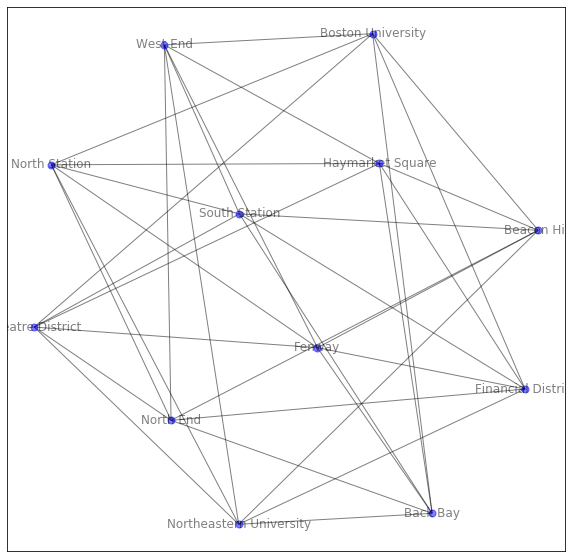

In [343]:
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_edgelist(uber,source='source',target='destination')
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

In [344]:
uber['time_stamp'] = pd.to_datetime(uber['time_stamp'], unit='ms')
uber['date'] = uber['time_stamp'].dt.date  # extract date
uber['hour'] = uber['time_stamp'].dt.hour  # extract hour
uber['minute'] = uber['time_stamp'].dt.minute

uber.drop('time_stamp', axis=1, inplace=True)

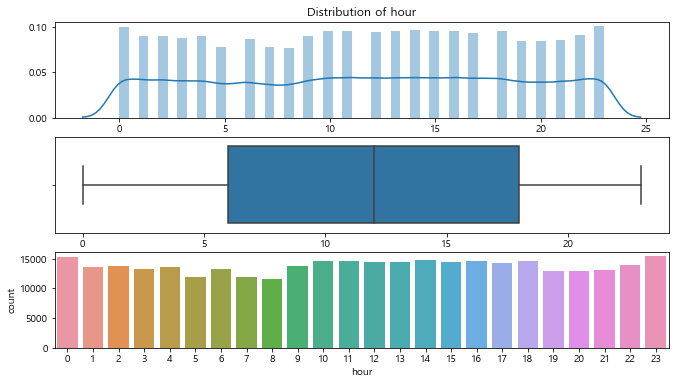

In [345]:
f, axes = plt.subplots(3, 1, figsize=(11, 6))

sns.distplot(uber['hour'], ax = axes[0]).set_title("Distribution of hour")
sns.boxplot(uber['hour'], ax = axes[1])
sns.countplot(uber['hour'], ax=axes[2])
plt.show()

In [350]:
# wheather

In [351]:
w_data = pd.read_csv('D:/ml/uber_analysis/uber_lyft_cab_price/weather.csv')

In [352]:
w_data.head(3)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07


In [353]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
temp          6276 non-null float64
location      6276 non-null object
clouds        6276 non-null float64
pressure      6276 non-null float64
rain          894 non-null float64
time_stamp    6276 non-null int64
humidity      6276 non-null float64
wind          6276 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [354]:
w_c_col = weather_data.columns[weather_data.dtypes == 'object']
w_n_col = weather_data.columns[weather_data.dtypes != 'object']

In [355]:
w_data[w_n_col].isna().sum()

temp             0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [356]:
w_data[w_n_col].isna().sum() / len(w_data[w_n_col])*100

temp           0.000000
clouds         0.000000
pressure       0.000000
rain          85.755258
time_stamp     0.000000
humidity       0.000000
wind           0.000000
dtype: float64

In [357]:
w_data['rain'].value_counts()

0.0030    85
0.0020    51
0.0040    23
0.0060    17
0.0050    15
          ..
0.1370     1
0.0664     1
0.7222     1
0.0223     1
0.1561     1
Name: rain, Length: 437, dtype: int64

In [358]:
w_data['rain'] = w_data['rain'].fillna(0)

In [359]:
w_data[w_n_col].isna().sum()

temp          0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

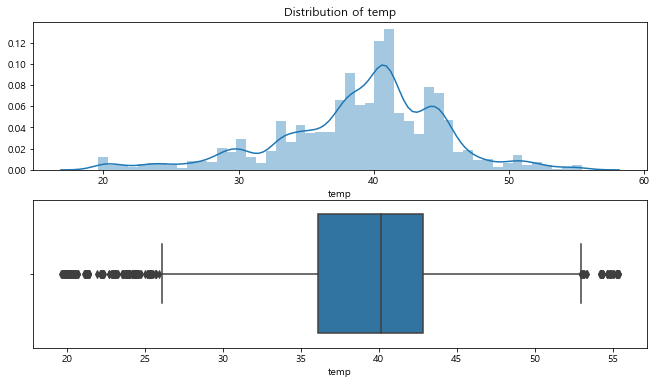

count    6276.0000
mean       39.0905
std         6.0221
min        19.6200
25%        36.0775
50%        40.1300
75%        42.8325
max        55.4100
Name: temp, dtype: float64
Skewness          -0.6368
Kurtosis          0.9474


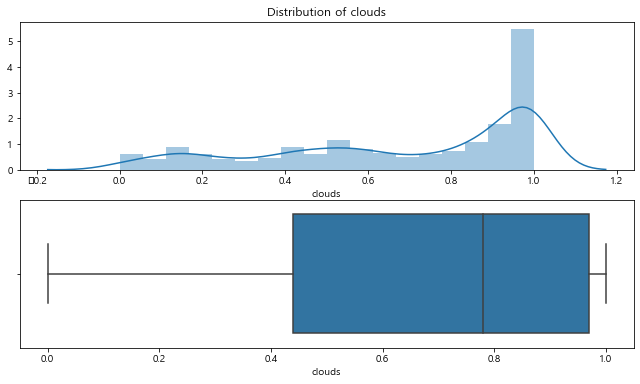

count    6276.0000
mean        0.6778
std         0.3143
min         0.0000
25%         0.4400
50%         0.7800
75%         0.9700
max         1.0000
Name: clouds, dtype: float64
Skewness          -0.6299
Kurtosis          -0.9471


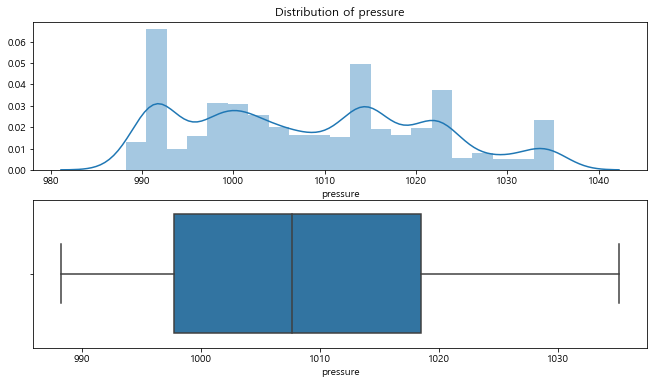

count    6276.0000
mean     1008.4452
std        12.8708
min       988.2500
25%       997.7475
50%      1007.6600
75%      1018.4800
max      1035.1200
Name: pressure, dtype: float64
Skewness          0.258
Kurtosis          -0.9728


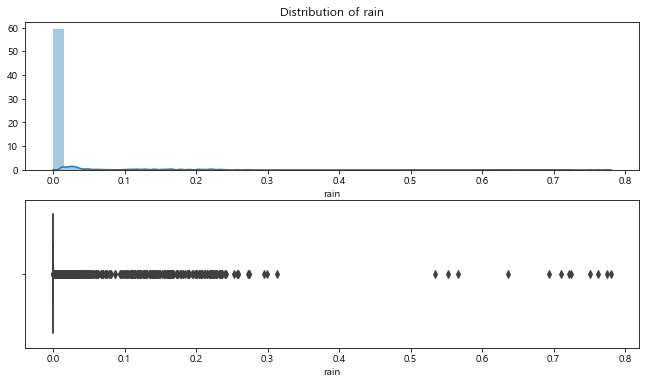

count    6276.0000
mean        0.0082
std         0.0430
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max         0.7807
Name: rain, dtype: float64
Skewness          9.85
Kurtosis          134.0169


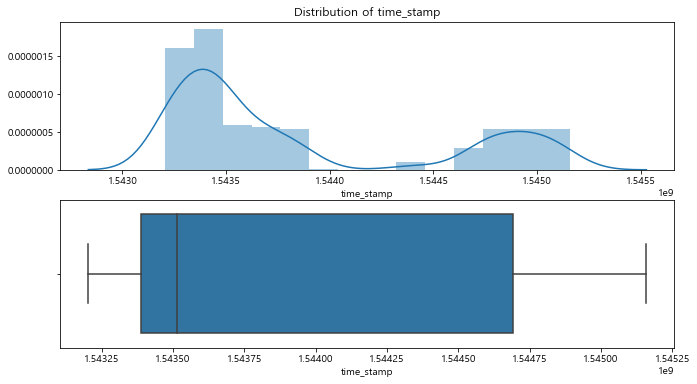

count    6.276000e+03
mean     1.543857e+09
std      6.659340e+05
min      1.543204e+09
25%      1.543387e+09
50%      1.543514e+09
75%      1.544691e+09
max      1.545159e+09
Name: time_stamp, dtype: float64
Skewness          0.8685
Kurtosis          -0.944


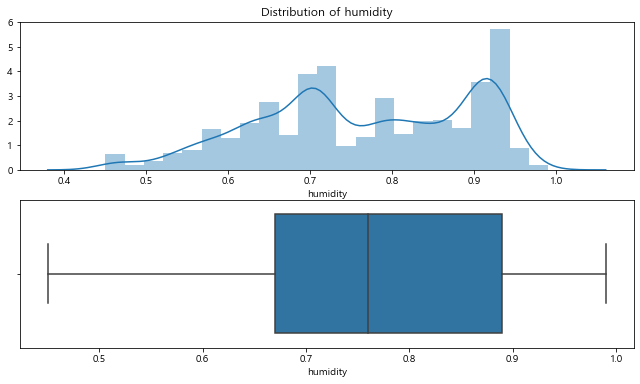

count    6276.0000
mean        0.7640
std         0.1273
min         0.4500
25%         0.6700
50%         0.7600
75%         0.8900
max         0.9900
Name: humidity, dtype: float64
Skewness          -0.2341
Kurtosis          -0.9497


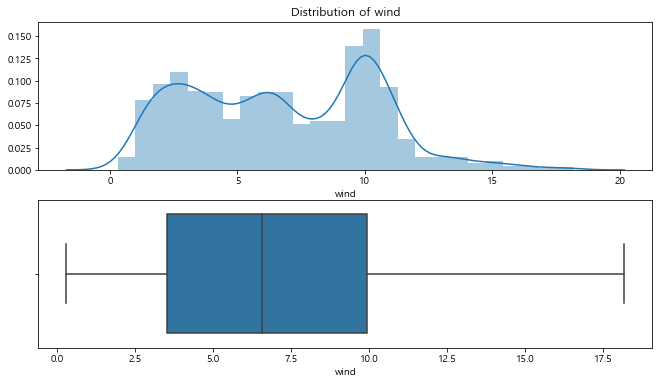

count    6276.0000
mean        6.8028
std         3.6335
min         0.2900
25%         3.5175
50%         6.5700
75%         9.9200
max        18.1800
Name: wind, dtype: float64
Skewness          0.2036
Kurtosis          -0.7685


In [360]:
for i in w_n_col:
    
    f, axes = plt.subplots(2, 1, figsize=(11, 6))

    sns.distplot(w_data[i], ax = axes[0]).set_title("Distribution of "+i)
    sns.boxplot(w_data[i], ax = axes[1])
    plt.show()
    
    print(round(w_data[i].describe(), 4))
    print('Skewness         ',round(w_data[i].skew(),4))
    print('Kurtosis         ',round(w_data[i].kurtosis(),4))

In [361]:
w_data['time_stamp'] = pd.to_datetime(w_data['time_stamp'], unit='s')
w_data['date'] = w_data['time_stamp'].dt.date
w_data['hour'] = w_data['time_stamp'].dt.hour

w_data.drop('time_stamp', axis=1, inplace=True)

w_data.head(3)

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16,23
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16,23
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16,23


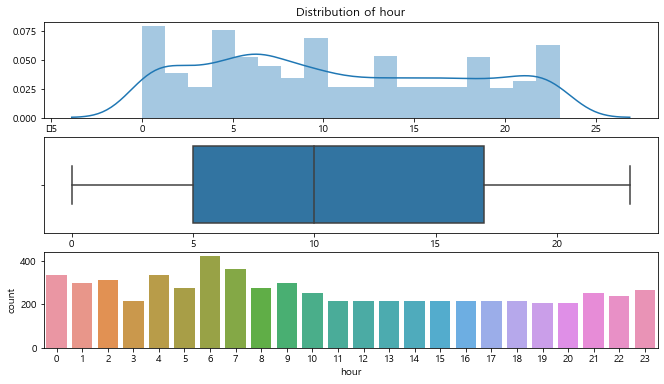

In [362]:
f, axes = plt.subplots(3, 1, figsize=(11, 6))

sns.distplot(w_data['hour'], ax = axes[0]).set_title("Distribution of hour")
sns.boxplot(w_data['hour'], ax = axes[1])
sns.countplot(w_data['hour'], ax=axes[2])
plt.show()

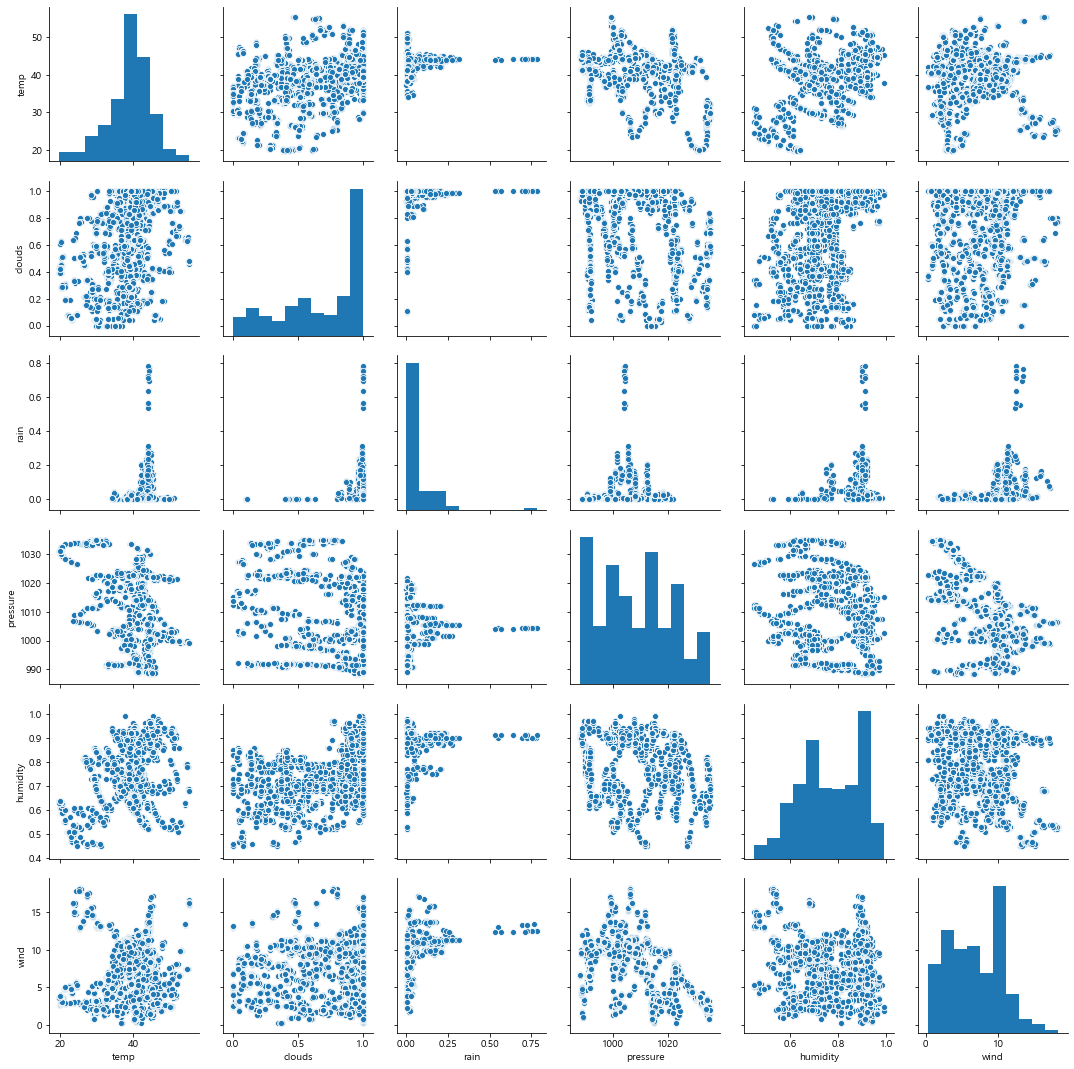

In [363]:
sns.pairplot(weather_data[['temp', 'clouds', 'rain', 'pressure', 'humidity', 'wind']])

In [364]:
w_c_col

Index(['location'], dtype='object')

In [365]:
w_data['location'].value_counts()

South Station              523
Northeastern University    523
Theatre District           523
Financial District         523
Beacon Hill                523
North Station              523
Haymarket Square           523
Boston University          523
Fenway                     523
West End                   523
North End                  523
Back Bay                   523
Name: location, dtype: int64

In [366]:
w_n_col

Index(['temp', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity', 'wind'], dtype='object')

In [367]:
w_n_col = w_n_col.drop('time_stamp')

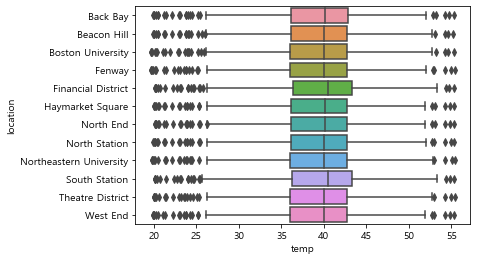

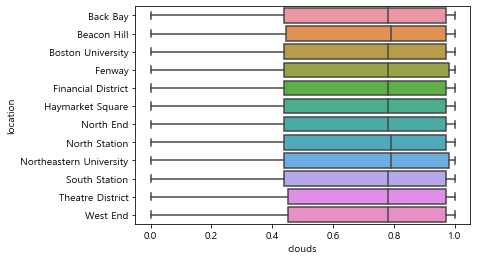

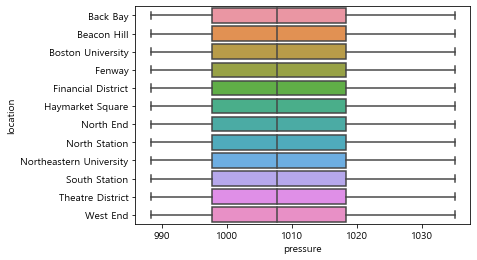

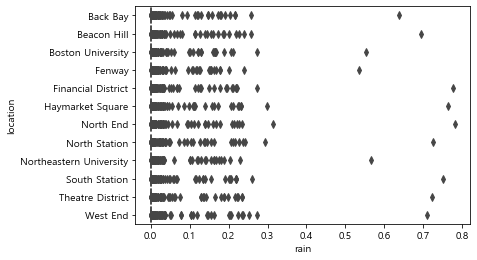

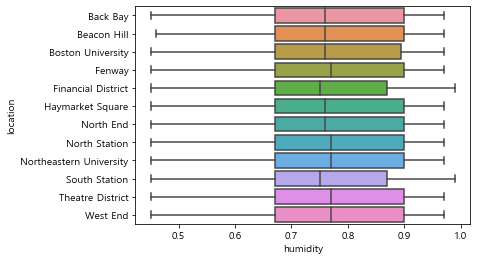

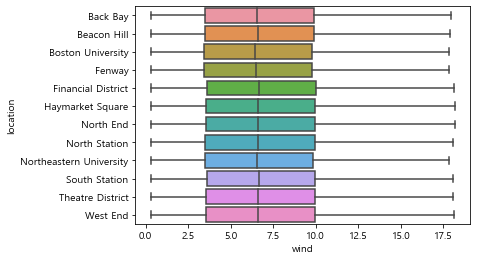

In [368]:
for i in w_n_col:
    
    sns.boxplot(w_data[i], y=w_data['location'])
    
    plt.show()
    

In [369]:
uber.head(3)

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hour,minute
12,1.11,Uber,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30,22,13
13,1.11,Uber,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13,10,50
14,1.11,Uber,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13,19,15


In [370]:
w_data.head(3)

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16,23
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16,23
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16,23


In [371]:
w_data[w_data['location'] == "Back Bay"]

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
0,42.42,Back Bay,1.00,1012.14,0.1228,0.77,11.25,2018-12-16,23
11,43.28,Back Bay,0.81,990.81,0.0000,0.71,8.30,2018-11-27,19
25,39.23,Back Bay,0.83,996.09,0.0000,0.66,10.67,2018-11-29,0
36,27.27,Back Bay,0.15,1033.40,0.0000,0.80,2.96,2018-12-14,11
47,45.49,Back Bay,1.00,1012.46,0.0000,0.86,6.47,2018-11-26,17
...,...,...,...,...,...,...,...,...,...
6203,50.60,Back Bay,1.00,1002.87,0.0000,0.92,3.99,2018-12-02,22
6221,29.91,Back Bay,0.04,1016.53,0.0000,0.84,3.17,2018-11-30,11
6232,32.81,Back Bay,0.88,1020.17,0.0000,0.79,4.19,2018-12-01,9
6251,39.50,Back Bay,1.00,1018.07,0.0301,0.92,5.38,2018-12-02,11


In [372]:
w_data_grp = w_data.groupby(['location', 'date','hour']).mean()

In [373]:
w_data_grp.head(3)

temp  clouds    pressure  rain  humidity  \
location date       hour                                                 
Back Bay 2018-11-26 3     41.04000   0.870  1014.39000   0.0   0.92000   
                    4     40.65800   0.894  1014.00800   0.0   0.92600   
                    5     40.56125   0.930  1013.82125   0.0   0.92125   

                             wind  
location date       hour           
Back Bay 2018-11-26 3     1.46000  
                    4     2.64600  
                    5     2.49625

In [374]:
w_data_grp.reset_index(inplace = True)

In [375]:
w_data_grp.head()

,location,date,hour,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,2018-11-26,3,41.040000,0.870000,1014.390000,0.0,0.920000,1.460000
1,Back Bay,2018-11-26,4,40.658000,0.894000,1014.008000,0.0,0.926000,2.646000
2,Back Bay,2018-11-26,5,40.561250,0.930000,1013.821250,0.0,0.921250,2.496250
3,Back Bay,2018-11-26,6,40.627333,0.990667,1014.196667,0.0,0.913333,1.350667
4,Back Bay,2018-11-26,7,41.137500,0.970000,1014.292500,0.0,0.920000,1.735000


In [376]:
merged_data = pd.merge(uber, w_data_grp, how='left', left_on=['source', 'date', 'hour'],
        right_on=['location', 'date', 'hour'])

In [377]:
merged_data.head(3)

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hour,minute,location,temp,clouds,pressure,rain,humidity,wind
0,1.11,Uber,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30,22,13,North End,38.65,0.96,1017.23,0.0,0.65,3.13
1,1.11,Uber,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13,10,50,North End,20.12,0.43,1031.07,0.0,0.64,3.88
2,1.11,Uber,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13,19,15,North End,32.75,0.51,1033.75,0.0,0.57,1.90


In [378]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330568 entries, 0 to 330567
Data columns (total 19 columns):
distance            330568 non-null float64
cab_type            330568 non-null object
destination         330568 non-null object
source              330568 non-null object
price               330568 non-null float64
surge_multiplier    330568 non-null float64
id                  330568 non-null object
product_id          330568 non-null object
name                330568 non-null object
date                330568 non-null object
hour                330568 non-null int64
minute              330568 non-null int64
location            329140 non-null object
temp                329140 non-null float64
clouds              329140 non-null float64
pressure            329140 non-null float64
rain                329140 non-null float64
humidity            329140 non-null float64
wind                329140 non-null float64
dtypes: float64(9), int64(2), object(8)
memory usage: 50.4+ MB


In [379]:
merged_data.isnull().sum()

distance               0
cab_type               0
destination            0
source                 0
price                  0
surge_multiplier       0
id                     0
product_id             0
name                   0
date                   0
hour                   0
minute                 0
location            1428
temp                1428
clouds              1428
pressure            1428
rain                1428
humidity            1428
wind                1428
dtype: int64

In [380]:
merged_data[merged_data.location.isnull()]

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hour,minute,location,temp,clouds,pressure,rain,humidity,wind
262,3.23,Uber,Beacon Hill,Boston University,13.0,1.0,709c24d1-753f-4dd6-86cf-fda8be58304e,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-04,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,0.91,Uber,Beacon Hill,Haymarket Square,11.5,1.0,9539229b-02f6-494d-ba40-d46a4950dd17,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,1.23,Uber,North End,West End,27.0,1.0,5d3fb41f-adec-4114-9252-f93cffbb3797,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-11-28,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,2.38,Uber,North Station,South Station,8.5,1.0,ba99e7de-21b7-4494-beef-7459baf05434,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-28,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,1.11,Uber,West End,North End,5.5,1.0,ea1c2344-0df2-42a0-9f7a-eabb7839a069,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-04,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324928,2.32,Uber,Haymarket Square,Back Bay,9.5,1.0,771c453f-3455-4b02-858c-cf546656087a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-04,6,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327016,1.56,Uber,Back Bay,Boston University,7.5,1.0,cd667a0e-81e5-4b47-9e97-99d29b5b1a47,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-04,6,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327017,1.56,Uber,Back Bay,Boston University,7.5,1.0,d0f2a243-d857-424f-b0d9-bb9d06fac687,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-04,6,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327018,1.56,Uber,Back Bay,Boston University,12.0,1.0,e4d9c499-285e-4214-bd28-3c1fe8b1f376,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-04,6,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
merged_data[merged_data.location.isnull()].groupby(['date','hour']).mean()

,,distance,price,surge_multiplier,minute,temp,clouds,pressure,rain,humidity,wind
date,hour,,,,,,,,,,
2018-11-28,1,2.311558,16.727387,1.0,5.510050,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-04,6,2.242513,15.903226,1.0,24.146505,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-18,19,2.348811,15.931818,1.0,7.867133,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
merged_data[merged_data.location.isnull()].groupby(['source','date','hour']).mean().head(12)

distance      price  surge_multiplier  \
source            date       hour                                          
Back Bay          2018-11-28 1     2.756333  18.916667               1.0   
                  2018-12-04 6     2.312759  15.844828               1.0   
                  2018-12-18 19    2.795385  19.384615               1.0   
Beacon Hill       2018-11-28 1     2.054706  14.750000               1.0   
                  2018-12-04 6     1.847917  16.062500               1.0   
                  2018-12-18 19    2.127586  14.758621               1.0   
Boston University 2018-11-28 1     2.680741  14.629630               1.0   
                  2018-12-04 6     2.718511  16.542553               1.0   
                  2018-12-18 19    3.686571  18.428571               1.0   
Fenway            2018-11-28 1     2.788788  19.166667               1.0   
                  2018-12-04 6     2.588358  15.902985               1.0   
                  2018-12-18 19    2.391765  16.323529               1.0   

                                      minute  temp  clouds  pressure  rain  \
source            date       hour                                            
Back Bay          2018-11-28 1      6.800000   NaN     NaN       NaN   NaN   
                  2018-12-04 6     26.224138   NaN     NaN       NaN   NaN   
                  2018-12-18 19     7.307692   NaN     NaN       NaN   NaN   
Beacon Hill       2018-11-28 1      8.029412   NaN     NaN       NaN   NaN   
                  2018-12-04 6     24.000000   NaN     NaN       NaN   NaN   
                  2018-12-18 19     6.379310   NaN     NaN       NaN   NaN   
Boston University 2018-11-28 1      6.888889   NaN     NaN       NaN   NaN   
                  2018-12-04 6     26.276596   NaN     NaN       NaN   NaN   
                  2018-12-18 19     5.857143   NaN     NaN       NaN   NaN   
Fenway            2018-11-28 1      3.909091   NaN     NaN       NaN   NaN   
                  2018-12-04 6     25.089552   NaN     NaN       NaN   NaN   
                  2018-12-18 19    10.294118   NaN     NaN       NaN   NaN   

                                   humidity  wind  
source            date       hour                  
Back Bay          2018-11-28 1          NaN   NaN  
                  2018-12-04 6          NaN   NaN  
                  2018-12-18 19         NaN   NaN  
Beacon Hill       2018-11-28 1          NaN   NaN  
                  2018-12-04 6          NaN   NaN  
                  2018-12-18 19         NaN   NaN  
Boston University 2018-11-28 1          NaN   NaN  
                  2018-12-04 6          NaN   NaN  
                  2018-12-18 19         NaN   NaN  
Fenway            2018-11-28 1          NaN   NaN  
                  2018-12-04 6          NaN   NaN  
                  2018-12-18 19         NaN   NaN

In [383]:
merged_data.dropna(how='any', inplace=True)

In [384]:
merged_data.isnull().sum()

distance            0
cab_type            0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date                0
hour                0
minute              0
location            0
temp                0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
dtype: int64

In [385]:
merged_data.shape

(329140, 19)

In [386]:
merged_data = merged_data.drop(['id','product_id', 'location'], axis =1)

In [387]:
merged_data.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date,hour,minute,temp,clouds,pressure,rain,humidity,wind
0,1.11,Uber,West End,North End,12.0,1.0,UberXL,2018-11-30,22,13,38.65,0.96,1017.23,0.0000,0.65,3.13
1,1.11,Uber,West End,North End,16.0,1.0,Black,2018-12-13,10,50,20.12,0.43,1031.07,0.0000,0.64,3.88
2,1.11,Uber,West End,North End,7.5,1.0,UberX,2018-12-13,19,15,32.75,0.51,1033.75,0.0000,0.57,1.90
3,1.11,Uber,West End,North End,7.5,1.0,WAV,2018-12-16,23,55,42.36,1.00,1012.15,0.2088,0.77,11.46
4,1.11,Uber,West End,North End,26.0,1.0,Black SUV,2018-12-14,0,40,30.07,0.69,1034.97,0.0000,0.68,1.98


In [388]:
merged_data.to_csv('uber_expl.csv')